In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score, RandomizedSearchCV,train_test_split
from sklearn import metrics
from xgboost import XGBClassifier
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import ConfusionMatrixDisplay



In [5]:
X_train= pd.read_csv('X_train.csv')
X_test=pd.read_csv('X_test.csv')
y_test=pd.read_csv('y_test.csv')
y_train=pd.read_csv('y_train.csv')
df=pd.read_csv('pf.csv')
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,0.250000,1.0,0.0,1.0,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.50,0.0,1.00,0.0,0.0,1.0,0.0
1,0.916667,1.0,1.0,1.0,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.50,0.0,0.00,0.0,1.0,1.0,0.0
2,1.000000,1.0,0.0,1.0,0.5,0.0,0.0,1.0,1.0,1.0,0.0,0.00,0.0,0.25,0.0,0.0,0.0,0.0
3,0.833333,1.0,1.0,1.0,0.5,1.0,0.0,1.0,1.0,1.0,0.0,0.50,0.0,0.00,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.0,1.0,0.5,1.0,0.0,1.0,1.0,1.0,0.0,0.25,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64015,0.416667,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.75,0.0,0.00,0.0,0.0,0.0,1.0
64016,0.750000,1.0,1.0,1.0,0.5,1.0,1.0,0.0,1.0,1.0,0.0,0.25,0.0,0.00,1.0,0.0,0.0,1.0
64017,1.000000,0.0,1.0,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.00,0.5,0.00,1.0,0.0,1.0,1.0
64018,0.833333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.00,1.0,0.0,1.0,1.0


In [6]:
params = {
    "colsample_bytree": uniform(0.7, 0.3)
    ,"gamma": uniform(0, 0.5)
    ,"learning_rate": uniform(0.03, 0.3) # default 0.1 
    ,"max_depth": randint(2, 6) # default 3
    ,"n_estimators": randint(100, 1000) # default 100
    ,"subsample": uniform(0.6, 0.4)
}
kf = KFold(n_splits=5,shuffle=True,random_state=25112002)

model= XGBClassifier(random_state=25112002,n_estimators=200,max_depth=100)

search = RandomizedSearchCV(model, param_distributions=params, random_state=42, cv=3, verbose=2, n_jobs=1, return_train_score=True)

search.fit(X_train,np.ravel(y_train))

prediction =search.best_estimator_.predict(X_test)
print(classification_report(y_test,prediction))
print('Accuracy',metrics.accuracy_score(y_test,prediction))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.8123620356542087, gamma=0.4753571532049581, learning_rate=0.24959818254342153, max_depth=2, n_estimators=120, subsample=0.6624074561769746; total time=   0.3s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.8123620356542087, gamma=0.4753571532049581, learning_rate=0.24959818254342153, max_depth=2, n_estimators=120, subsample=0.6624074561769746; total time=   0.3s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.8123620356542087, gamma=0.4753571532049581, learning_rate=0.24959818254342153, max_depth=2, n_estimators=120, subsample=0.6624074561769746; total time=   0.3s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.7467983561008608, gamma=0.02904180608409973, learning_rate=0.28985284373248055, max_depth=5, n_estimators=971, subsample=0.8832290311184181; total time=   4.8s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.7467983561008608, gamma=0.02904180608409973, learning_rate=0.28985284373248055, max_depth=5, n_estimators=971, subsample=0.8832290311184181; total time=   5.0s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.7467983561008608, gamma=0.02904180608409973, learning_rate=0.28985284373248055, max_depth=5, n_estimators=971, subsample=0.8832290311184181; total time=   5.0s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.7061753482887407, gamma=0.48495492608099716, learning_rate=0.2797327922401265, max_depth=3, n_estimators=485, subsample=0.6727299868828402; total time=   1.8s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.7061753482887407, gamma=0.48495492608099716, learning_rate=0.2797327922401265, max_depth=3, n_estimators=485, subsample=0.6727299868828402; total time=   1.9s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.7061753482887407, gamma=0.48495492608099716, learning_rate=0.2797327922401265, max_depth=3, n_estimators=485, subsample=0.6727299868828402; total time=   1.9s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.7550213529560301, gamma=0.15212112147976886, learning_rate=0.18742692948967135, max_depth=5, n_estimators=956, subsample=0.7164916560792167; total time=   5.3s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.7550213529560301, gamma=0.15212112147976886, learning_rate=0.18742692948967135, max_depth=5, n_estimators=956, subsample=0.7164916560792167; total time=   5.3s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.7550213529560301, gamma=0.15212112147976886, learning_rate=0.18742692948967135, max_depth=5, n_estimators=956, subsample=0.7164916560792167; total time=   5.3s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.8835558684167137, gamma=0.06974693032602092, learning_rate=0.11764339456056544, max_depth=5, n_estimators=882, subsample=0.7824279936868144; total time=   5.2s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.8835558684167137, gamma=0.06974693032602092, learning_rate=0.11764339456056544, max_depth=5, n_estimators=882, subsample=0.7824279936868144; total time=   5.1s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.8835558684167137, gamma=0.06974693032602092, learning_rate=0.11764339456056544, max_depth=5, n_estimators=882, subsample=0.7824279936868144; total time=   5.2s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.935552788417904, gamma=0.09983689107917987, learning_rate=0.18427033152408348, max_depth=5, n_estimators=604, subsample=0.6185801650879991; total time=   3.5s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.935552788417904, gamma=0.09983689107917987, learning_rate=0.18427033152408348, max_depth=5, n_estimators=604, subsample=0.6185801650879991; total time=   3.7s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.935552788417904, gamma=0.09983689107917987, learning_rate=0.18427033152408348, max_depth=5, n_estimators=604, subsample=0.6185801650879991; total time=   3.9s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.8822634555704314, gamma=0.08526206184364576, learning_rate=0.04951547789558385, max_depth=5, n_estimators=700, subsample=0.9862528132298237; total time=   3.7s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.8822634555704314, gamma=0.08526206184364576, learning_rate=0.04951547789558385, max_depth=5, n_estimators=700, subsample=0.9862528132298237; total time=   3.8s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.8822634555704314, gamma=0.08526206184364576, learning_rate=0.04951547789558385, max_depth=5, n_estimators=700, subsample=0.9862528132298237; total time=   3.9s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.9425192044349383, gamma=0.15230688458668534, learning_rate=0.05930163420191516, max_depth=5, n_estimators=191, subsample=0.7760609974958406; total time=   1.2s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.9425192044349383, gamma=0.15230688458668534, learning_rate=0.05930163420191516, max_depth=5, n_estimators=191, subsample=0.7760609974958406; total time=   1.2s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.9425192044349383, gamma=0.15230688458668534, learning_rate=0.05930163420191516, max_depth=5, n_estimators=191, subsample=0.7760609974958406; total time=   1.2s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.7366114704534336, gamma=0.2475884550556351, learning_rate=0.04031655633456552, max_depth=3, n_estimators=180, subsample=0.7035119926400067; total time=   0.7s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.7366114704534336, gamma=0.2475884550556351, learning_rate=0.04031655633456552, max_depth=3, n_estimators=180, subsample=0.7035119926400067; total time=   0.8s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.7366114704534336, gamma=0.2475884550556351, learning_rate=0.04031655633456552, max_depth=3, n_estimators=180, subsample=0.7035119926400067; total time=   0.8s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.8987566853061946, gamma=0.15585553804470548, learning_rate=0.18602040635334324, max_depth=3, n_estimators=871, subsample=0.6739417822102108; total time=   3.7s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.8987566853061946, gamma=0.15585553804470548, learning_rate=0.18602040635334324, max_depth=3, n_estimators=871, subsample=0.6739417822102108; total time=   3.7s


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

[CV] END colsample_bytree=0.8987566853061946, gamma=0.15585553804470548, learning_rate=0.18602040635334324, max_depth=3, n_estimators=871, subsample=0.6739417822102108; total time=   3.8s
              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70      9233
         1.0       0.72      0.79      0.75      9973

    accuracy                           0.73     19206
   macro avg       0.73      0.73      0.73     19206
weighted avg       0.73      0.73      0.73     19206

Accuracy 0.7291992085806519


c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\joaom\miniconda3\envs\envNAME\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_boo

In [7]:
print(f1_score(y_test,prediction, average='macro'))
print(f1_score(y_test,prediction, average='micro'))
print(f1_score(y_test,prediction, average='weighted'))


0.7269451410525443
0.729199208580652
0.727901020691971


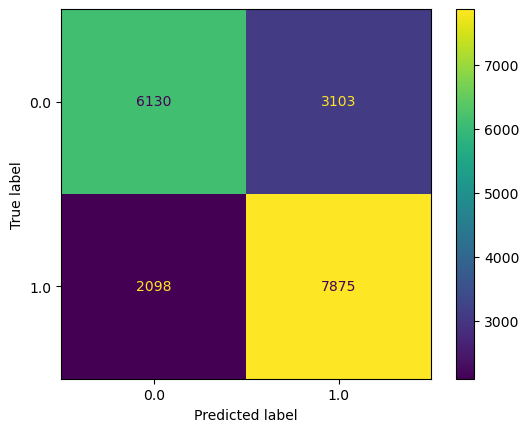

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test,prediction)